# LeNet-5 Convolutional Neural Network

In [33]:
import pandas as pd
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework import ops
from jupyterthemes import jtplot

In [34]:
tf.disable_eager_execution()

In [35]:
def load_data(filePath):
    data = pd.read_csv(filePath)
    if filePath == 'train.csv':
        X = data.iloc[:,1:].values
        Y = data.iloc[:,:1].values
        Y_hot = np.eye(10)[Y]
        Y_hot = Y_hot.reshape(Y_hot.shape[0],Y_hot.shape[2])
        return X,Y,Y_hot
    elif filePath == 'test.csv':
        X = data.iloc[:,:].values
        return X

In [36]:
def fix_padding(X,p = 2):
    m = X.shape[0]
    X = X.reshape(m,28,28,1)
    X = np.pad(X,((0,0),(p,p),(p,p),(0,0)),'constant')
    X = X.reshape(m,32*32)
    return X

In [37]:
X_train, Y_train, Y_train_hot = load_data("train.csv")
X_test = load_data("test.csv")
X_train = fix_padding(X_train)
X_test = fix_padding(X_test)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_train_hot.shape)

(42000, 1024)
(28000, 1024)
(42000, 1)
(42000, 10)


The label is: [2]


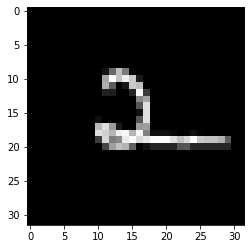

In [39]:
digit = X_train[55,:].reshape((32,32),order='C')
plt.imshow(digit, cmap='gray', interpolation='nearest');
print("The label is: " + str(Y_train[55]))

In [40]:
def create_placeholders(n_x,n_y):
    X = tf.placeholder(tf.float32,[None,n_x])
    Y = tf.placeholder(tf.float32,[None,n_y])
    return X,Y

In [41]:
def next_random_batch(data,labels,batch_size = 210):
    idx = np.arange(len(labels))
    np.random.shuffle(idx)
    idx = idx[: batch_size]
    shuffled = [data[i] for i in idx]
    shuffled_labels = [labels[i] for i in idx]
    return np.array(shuffled),np.array(shuffled_labels)

In [42]:
miniX,miniY = next_random_batch(X_train,Y_train_hot)
print(miniX.shape)
print(miniY.shape)

(210, 1024)
(210, 10)


In [43]:
def initialize_parameters_v1():
    W1 = tf.get_variable("W1",[5,5,1,6],initializer=tf.contrib.layers.xavier_initializer(seed=0,dtype=tf.float32))
    W2 = tf.get_variable("W2",[5,5,6,16],initializer=tf.contrib.layers.xavier_initializer(seed=0),dtype=tf.float32)
    W3 = tf.get_variable("W3",[400,120],initializer=tf.contrib.layers.xavier_initializer(seed=0),dtype=tf.float32)
    W4 = tf.get_variable("W4",[120,84],initializer=tf.contrib.layers.xavier_initializer(seed=0),dtype=tf.float32)
    W5 = tf.get_variable("W5",[84,10],initializer=tf.contrib.layers.xavier_initializer(seed=0),dtype=tf.float32)
    
    b1 = tf.get_variable("b1",[6],initializer=tf.zeros_initializer(tf.float32))
    b2 = tf.get_variable("b2",[16],initializer=tf.zeros_initializer(tf.float32))
    b3 = tf.get_variable("b3",[120],initializer=tf.zeros_initializer(tf.float32))
    b4 = tf.get_variable("b4",[84],initializer=tf.zeros_initializer(tf.float32))
    b5 = tf.get_variable("b5",[10],initializer=tf.zeros_initializer(tf.float32))
    parameters = {
        "W1":W1,
        "W2":W2,
        "W3":W3,
        "W4":W4,
        "W5":W5,
        "b1":b1,
        "b2":b2,
        "b3":b3,
        "b4":b4,
        "b5":b5
    }
    return parameters
def initialize_parameters_v2():
    W1 = tf.Variable(tf.random.normal([5,5,1,6]),name="W1")
    W2 = tf.Variable(tf.random.normal([5,5,6,16]),name="W2")
    W3 = tf.Variable(tf.random_normal([400,120]),name="W3")
    W4 = tf.Variable(tf.random_normal([120,84]),name="W4")
    W5 = tf.Variable(tf.random_normal([84,10]),name="W5")
    
    b1 = tf.Variable(tf.zeros([6]),dtype=tf.float32,name="b1")
    b2 = tf.Variable(tf.zeros([16]),dtype=tf.float32,name="b2")
    b3 = tf.Variable(tf.zeros([120]),dtype=tf.float32,name="b3")
    b4 = tf.Variable(tf.zeros([84]),dtype=tf.float32,name="b4")
    b5 = tf.Variable(tf.zeros([10]),dtype=tf.float32,name="b5")
    parameters = {
        "W1":W1,
        "W2":W2,
        "W3":W3,
        "W4":W4,
        "W5":W5,
        "b1":b1,
        "b2":b2,
        "b3":b3,
        "b4":b4,
        "b5":b5
    }
    return parameters

In [17]:
def conv2d(X,W,b,s=1,padding='VALID'):
    return tf.nn.relu(tf.add(tf.nn.conv2d(X,W,[1,s,s,1],padding=padding),b))
def maxpool2d(X,k=2,padding="VALID"):
    return tf.nn.max_pool(X,ksize=[1,k,k,1],strides=[1,k,k,1],padding=padding)
def fullConvLayer(X,W,b,s=1,k=2,padding='VALID'):
    return maxpool2d(conv2d(X,W,b,s,padding),k,padding)
def fc_forward(X,W,b):
    return tf.add(tf.matmul(X,W),b)

In [44]:
def LeNet_5(X,parameters):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    W3 = parameters["W3"]
    W4 = parameters["W4"]
    W5 = parameters["W5"]
    
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    b3 = parameters["b3"]
    b4 = parameters["b4"]
    b5 = parameters["b5"]
    
    X = tf.reshape(X,shape = [-1,32,32,1])
    
    A1 = fullConvLayer(X,W1,b1)
    
    
    A2 = fullConvLayer(A1,W2,b2)
    A2 = tf.reshape(A2,shape=[-1,A2.shape[1]*A2.shape[2]*A2.shape[3]])
    
    
    Z3 = fc_forward(A2,W3,b3)
    A3 = tf.nn.relu(Z3)
        
    Z4 = fc_forward(A3,W4,b4)
    A4 = tf.nn.relu(Z4)
    
    Z5 = fc_forward(A4,W5,b5)
    return Z5
    

In [45]:
def compute_cost(logits,labels):
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels,logits=logits))
    return cost/210

In [46]:
def CNN_model(X_train,Y_train_hot,learning_rate = 0.001,batch_size = 210,nbEpochs = 1000):
    ops.reset_default_graph()
    parameters = initialize_parameters_v2()
    X,Y = create_placeholders(X_train.shape[1],Y_train_hot.shape[1])
    logits = LeNet_5(X,parameters)
    cost = compute_cost(logits = logits,labels = Y)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(logits,axis=1),tf.argmax(Y,axis=1)),dtype=tf.float64))
    train = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    init = tf.global_variables_initializer()
    cost_hist,acc_hist = [],[]
    #nbBatches = int(X_train.shape[0]/batch_size)
    nbBatches = 1
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(nbEpochs):
            epoch_cost,epoch_acc = 0.0,0.0
            for i in range(nbBatches):
                miniX,miniY = next_random_batch(X_train,Y_train_hot,batch_size)
                _,mini_cost,mini_accuracy = sess.run([train,cost,accuracy],feed_dict={X:miniX,Y:miniY})
                epoch_cost += mini_cost/nbBatches
                epoch_acc +=  mini_accuracy/nbBatches
            cost_hist.append(mini_cost)
            acc_hist.append(mini_accuracy)
            print("Epoch: "+str(epoch) + " Accuracy : "+str(mini_accuracy) + " Cost: "+str(mini_cost))
        return sess.run(parameters),cost_hist,acc_hist

In [47]:
parameters,cost_hist,acc_hist = CNN_model(X_train,Y_train_hot)

Epoch: 0 Accuracy : 0.10952380952380952 Cost: 23205.355
Epoch: 1 Accuracy : 0.11428571428571428 Cost: 22727.646
Epoch: 2 Accuracy : 0.13333333333333333 Cost: 20350.025
Epoch: 3 Accuracy : 0.16666666666666666 Cost: 19469.574
Epoch: 4 Accuracy : 0.09523809523809523 Cost: 18694.781
Epoch: 5 Accuracy : 0.08571428571428572 Cost: 18475.566
Epoch: 6 Accuracy : 0.1761904761904762 Cost: 14321.279
Epoch: 7 Accuracy : 0.13333333333333333 Cost: 15556.833
Epoch: 8 Accuracy : 0.09047619047619047 Cost: 14748.217
Epoch: 9 Accuracy : 0.18095238095238095 Cost: 12576.731
Epoch: 10 Accuracy : 0.09047619047619047 Cost: 14064.325
Epoch: 11 Accuracy : 0.11904761904761904 Cost: 11883.962
Epoch: 12 Accuracy : 0.12380952380952381 Cost: 10709.135
Epoch: 13 Accuracy : 0.12380952380952381 Cost: 10693.912
Epoch: 14 Accuracy : 0.09523809523809523 Cost: 11243.334
Epoch: 15 Accuracy : 0.1380952380952381 Cost: 8951.967
Epoch: 16 Accuracy : 0.11904761904761904 Cost: 10326.639
Epoch: 17 Accuracy : 0.12380952380952381 Cos

Epoch: 149 Accuracy : 0.5619047619047619 Cost: 1788.8213
Epoch: 150 Accuracy : 0.6190476190476191 Cost: 1554.5654
Epoch: 151 Accuracy : 0.6047619047619047 Cost: 1553.4833
Epoch: 152 Accuracy : 0.6428571428571429 Cost: 1376.7402
Epoch: 153 Accuracy : 0.6333333333333333 Cost: 1503.1313
Epoch: 154 Accuracy : 0.5952380952380952 Cost: 1816.025
Epoch: 155 Accuracy : 0.6285714285714286 Cost: 1277.1674
Epoch: 156 Accuracy : 0.6047619047619047 Cost: 1463.6437
Epoch: 157 Accuracy : 0.6428571428571429 Cost: 1202.233
Epoch: 158 Accuracy : 0.5952380952380952 Cost: 1613.2123
Epoch: 159 Accuracy : 0.6095238095238096 Cost: 1423.274
Epoch: 160 Accuracy : 0.6047619047619047 Cost: 2105.997
Epoch: 161 Accuracy : 0.580952380952381 Cost: 1850.0908
Epoch: 162 Accuracy : 0.6190476190476191 Cost: 1460.2815
Epoch: 163 Accuracy : 0.6142857142857143 Cost: 1571.0138
Epoch: 164 Accuracy : 0.6571428571428571 Cost: 1306.8641
Epoch: 165 Accuracy : 0.6619047619047619 Cost: 1122.5012
Epoch: 166 Accuracy : 0.628571428571

Epoch: 296 Accuracy : 0.7714285714285715 Cost: 715.1243
Epoch: 297 Accuracy : 0.7333333333333333 Cost: 954.6346
Epoch: 298 Accuracy : 0.7428571428571429 Cost: 846.7548
Epoch: 299 Accuracy : 0.7428571428571429 Cost: 748.97736
Epoch: 300 Accuracy : 0.719047619047619 Cost: 683.59454
Epoch: 301 Accuracy : 0.7761904761904762 Cost: 871.0919
Epoch: 302 Accuracy : 0.7666666666666667 Cost: 1058.9291
Epoch: 303 Accuracy : 0.7904761904761904 Cost: 875.71106
Epoch: 304 Accuracy : 0.7238095238095238 Cost: 866.5769
Epoch: 305 Accuracy : 0.7476190476190476 Cost: 734.2647
Epoch: 306 Accuracy : 0.7619047619047619 Cost: 701.0302
Epoch: 307 Accuracy : 0.7333333333333333 Cost: 727.86847
Epoch: 308 Accuracy : 0.8476190476190476 Cost: 561.2377
Epoch: 309 Accuracy : 0.7666666666666667 Cost: 882.1898
Epoch: 310 Accuracy : 0.7619047619047619 Cost: 855.1477
Epoch: 311 Accuracy : 0.8 Cost: 736.1426
Epoch: 312 Accuracy : 0.7571428571428571 Cost: 877.2712
Epoch: 313 Accuracy : 0.7761904761904762 Cost: 627.25104
Ep

Epoch: 445 Accuracy : 0.7857142857142857 Cost: 533.821
Epoch: 446 Accuracy : 0.8238095238095238 Cost: 448.88092
Epoch: 447 Accuracy : 0.8095238095238095 Cost: 515.86633
Epoch: 448 Accuracy : 0.8523809523809524 Cost: 327.6982
Epoch: 449 Accuracy : 0.819047619047619 Cost: 583.292
Epoch: 450 Accuracy : 0.780952380952381 Cost: 626.1372
Epoch: 451 Accuracy : 0.819047619047619 Cost: 446.904
Epoch: 452 Accuracy : 0.8095238095238095 Cost: 550.17053
Epoch: 453 Accuracy : 0.819047619047619 Cost: 417.1829
Epoch: 454 Accuracy : 0.7761904761904762 Cost: 594.5805
Epoch: 455 Accuracy : 0.7666666666666667 Cost: 775.8813
Epoch: 456 Accuracy : 0.7761904761904762 Cost: 587.365
Epoch: 457 Accuracy : 0.780952380952381 Cost: 612.1403
Epoch: 458 Accuracy : 0.8380952380952381 Cost: 494.06256
Epoch: 459 Accuracy : 0.8428571428571429 Cost: 383.65753
Epoch: 460 Accuracy : 0.7952380952380952 Cost: 507.4651
Epoch: 461 Accuracy : 0.7714285714285715 Cost: 944.5597
Epoch: 462 Accuracy : 0.8238095238095238 Cost: 515.9

Epoch: 592 Accuracy : 0.8380952380952381 Cost: 496.86487
Epoch: 593 Accuracy : 0.7904761904761904 Cost: 666.81415
Epoch: 594 Accuracy : 0.8238095238095238 Cost: 493.1659
Epoch: 595 Accuracy : 0.7904761904761904 Cost: 552.86804
Epoch: 596 Accuracy : 0.8476190476190476 Cost: 447.15176
Epoch: 597 Accuracy : 0.8095238095238095 Cost: 679.43494
Epoch: 598 Accuracy : 0.8904761904761904 Cost: 247.9147
Epoch: 599 Accuracy : 0.8095238095238095 Cost: 451.9491
Epoch: 600 Accuracy : 0.8285714285714286 Cost: 534.5639
Epoch: 601 Accuracy : 0.8428571428571429 Cost: 345.644
Epoch: 602 Accuracy : 0.8285714285714286 Cost: 460.83276
Epoch: 603 Accuracy : 0.8571428571428571 Cost: 397.27194
Epoch: 604 Accuracy : 0.8523809523809524 Cost: 339.88065
Epoch: 605 Accuracy : 0.8666666666666667 Cost: 426.0969
Epoch: 606 Accuracy : 0.8333333333333334 Cost: 327.61426
Epoch: 607 Accuracy : 0.8333333333333334 Cost: 349.29202
Epoch: 608 Accuracy : 0.819047619047619 Cost: 510.49902
Epoch: 609 Accuracy : 0.819047619047619

Epoch: 738 Accuracy : 0.819047619047619 Cost: 527.8854
Epoch: 739 Accuracy : 0.8476190476190476 Cost: 318.57336
Epoch: 740 Accuracy : 0.8333333333333334 Cost: 372.83038
Epoch: 741 Accuracy : 0.9 Cost: 202.25478
Epoch: 742 Accuracy : 0.8714285714285714 Cost: 284.402
Epoch: 743 Accuracy : 0.8380952380952381 Cost: 387.05988
Epoch: 744 Accuracy : 0.8476190476190476 Cost: 350.34747
Epoch: 745 Accuracy : 0.8095238095238095 Cost: 397.23535
Epoch: 746 Accuracy : 0.8904761904761904 Cost: 282.13208
Epoch: 747 Accuracy : 0.8142857142857143 Cost: 454.96002
Epoch: 748 Accuracy : 0.8952380952380953 Cost: 386.99512
Epoch: 749 Accuracy : 0.8904761904761904 Cost: 241.05756
Epoch: 750 Accuracy : 0.861904761904762 Cost: 384.83224
Epoch: 751 Accuracy : 0.8523809523809524 Cost: 353.13
Epoch: 752 Accuracy : 0.8809523809523809 Cost: 218.72069
Epoch: 753 Accuracy : 0.8714285714285714 Cost: 336.54593
Epoch: 754 Accuracy : 0.8285714285714286 Cost: 431.86996
Epoch: 755 Accuracy : 0.8285714285714286 Cost: 417.761

Epoch: 884 Accuracy : 0.861904761904762 Cost: 236.40929
Epoch: 885 Accuracy : 0.8523809523809524 Cost: 251.64418
Epoch: 886 Accuracy : 0.8809523809523809 Cost: 213.05464
Epoch: 887 Accuracy : 0.9 Cost: 227.73015
Epoch: 888 Accuracy : 0.8666666666666667 Cost: 304.77927
Epoch: 889 Accuracy : 0.8380952380952381 Cost: 344.06088
Epoch: 890 Accuracy : 0.8761904761904762 Cost: 353.83963
Epoch: 891 Accuracy : 0.9 Cost: 170.37016
Epoch: 892 Accuracy : 0.9 Cost: 163.85588
Epoch: 893 Accuracy : 0.8904761904761904 Cost: 320.9488
Epoch: 894 Accuracy : 0.861904761904762 Cost: 204.41463
Epoch: 895 Accuracy : 0.8809523809523809 Cost: 252.38759
Epoch: 896 Accuracy : 0.861904761904762 Cost: 227.81313
Epoch: 897 Accuracy : 0.8571428571428571 Cost: 308.0101
Epoch: 898 Accuracy : 0.8571428571428571 Cost: 339.43527
Epoch: 899 Accuracy : 0.8809523809523809 Cost: 280.91418
Epoch: 900 Accuracy : 0.8904761904761904 Cost: 255.63242
Epoch: 901 Accuracy : 0.8952380952380953 Cost: 252.27223
Epoch: 902 Accuracy : 0.

In [48]:
jtplot.style()

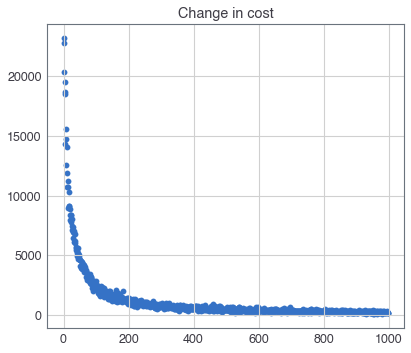

In [51]:
plt.scatter(list(range(len(cost_hist))), cost_hist)
plt.title("Change in cost")
plt.show()

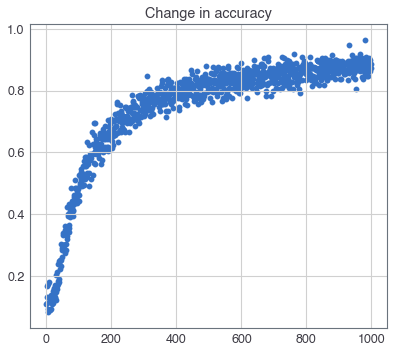

In [52]:
plt.scatter(list(range(len(acc_hist))), acc_hist)
plt.title("Change in accuracy")
plt.show()

In [41]:
#ops.reset_default_graph()
X,Y = create_placeholders(1024,10)
#parameters = initialize_parameters_v2()
logits = LeNet_5(X,parameters)
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    logits = sess.run(logits,feed_dict={X: X_test})
logits = np.array(logits)
labels = np.argmax(logits,axis=1)


The label is: 9


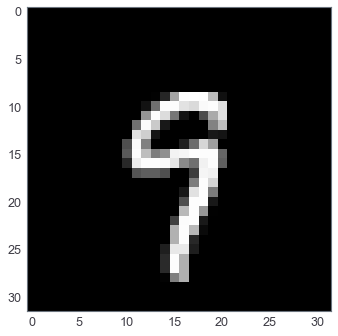

In [42]:
jtplot.style(grid=False)
index = 2324
digit = X_test[index,:].reshape((32,32),order='C')
plt.imshow(digit, cmap='gray', interpolation='nearest');
print("The label is: " + str(labels[index]))

In [ ]:
Id = np.array(range(X_test.shape[0])) + 1
results = np.stack([Id,labels],axis=1)